# Linear Regression with Multiple Variables

In [8]:
import pandas as pd
import numpy as np

In [4]:
data1 = pd.read_csv("E:\\Machine Learning\\1\\ex1data2.csv")
data1.head()

,X1,X2,Y
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


Data above contains a training set of housing prices in Portand, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

Feature Normalization

When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

In [16]:
X1 = data1["X1"]
X2 = data1["X2"]

X1 = (X1 - np.mean(X1)) / np.std(X1)
X2 = (X2 - np.mean(X2)) / np.std(X2)

data2 = pd.DataFrame({"X1": X1, "X2": X2, "Y": data1["Y"]})
data2.head()

,X1,X2,Y
0,0.131415,-0.226093,399900
1,-0.509641,-0.226093,329900
2,0.507909,-0.226093,369000
3,-0.743677,-1.554392,232000
4,1.271071,1.102205,539900


Gradient Descent

Hypothesis: H_x = theta0 * X0 + theta1 * X1 + theta2 * X2 + ... + thetan * Xn (X0 = 1) = X_matrix(size: m * (n + 1)) * theta_matrix (size: (n + 1) * 1) = Predicted Value (size: m * 1) --- Only one predicted value for each training set

Cost function: J_theta = 1/(2m) * sum((H_x - Y)^2)

Gradient descent: 

theta0 := theta0 - alpha * (1/m) * sum(H_x - Y)
theta1 := theta1 - alpha * (1/m) * sum((H_x - Y) * X1)
theta2 := theta2 - alpha * (1/m) * sum((H_x - Y) * X2)

Initialization: 

theta0 = 0, theta1 = 0, theta2 = 0
alpha = 0.01
iterations = 400

In [78]:
theta0 = 0
theta1 = 0
theta2 = 0

X_matrix = np.transpose(np.mat(np.vstack((np.ones(len(X1)), np.array(X1), np.array(X2)))))
theta_matrix = np.transpose(np.mat(np.array((theta0, theta1, theta2))))
Y_matrix = np.transpose(np.mat(np.array(data1["Y"])))
m = len(X_matrix)

H_x = X_matrix * theta_matrix
J_theta = sum(np.power(H_x - Y_matrix, 2)) / (2*m)

In [79]:
J_theta

matrix([[6.55915481e+10]])

In [121]:
def gradientDesc(theta0, theta1, theta2, iterations, alpha):
    theta0_list = []
    theta1_list = []
    theta2_list = []
    J_list = []
    
    for i in range(0, iterations, 1):
        theta0_list.append(theta0)
        theta1_list.append(theta1)
        theta2_list.append(theta2)
        
        X_matrix = np.transpose(np.mat(np.vstack((np.ones(len(X1)), np.array(X1), np.array(X2)))))
        theta_matrix = np.transpose(np.mat(np.array((theta0, theta1, theta2))))
        Y_matrix = np.transpose(np.mat(np.array(data1["Y"])))
        m = len(X_matrix)
    
        H_x = X_matrix * theta_matrix
        J_theta = (sum(np.power(H_x - Y_matrix, 2)) / (2*m))[0, 0]
        J_list.append(J_theta)
        
        theta0 = (theta0 - alpha/m * sum(H_x - Y_matrix))[0, 0]
        theta1 = (theta1 - alpha/m * sum(np.multiply(H_x - Y_matrix, X_matrix[:, 1])))[0, 0]
        theta2 = (theta2 - alpha/m * sum(np.multiply(H_x - Y_matrix, X_matrix[:, 2])))[0, 0]
        
        theta0_final = theta0_list[len(theta0_list) - 1]
        theta1_final = theta1_list[len(theta1_list) - 1]
        theta2_final = theta2_list[len(theta2_list) - 1]
        J_final = J_list[len(J_list) - 1]
    
    
    return theta0_final, theta1_final, theta2_final, J_final, J_list

In [120]:
print "theta0: ", gradientDesc(0, 0, 0, 400, 0.01)[0], "\n", "theta1: ", gradientDesc(0, 0, 0, 400, 0.01)[1], "\n", "theta2: ", gradientDesc(0, 0, 0, 400, 0.01)[2], "\n", "cost J: ", gradientDesc(0, 0, 0, 400, 0.01)[3] 

theta0:  334240.3408055882 
theta1:  99365.99989389487 
theta2:  3309.436008257655 
cost J:  2106213044.760492


Visualize Cost J

In [139]:
import matplotlib.pyplot as plt

In [134]:
iterations_list = list(np.arange(1, len(J_list) + 1, 1))
J_list = gradientDesc(0, 0, 0, 400, 0.01)[4]

J_df = pd.DataFrame({"Iterations": iterations_list, "J": J_list})

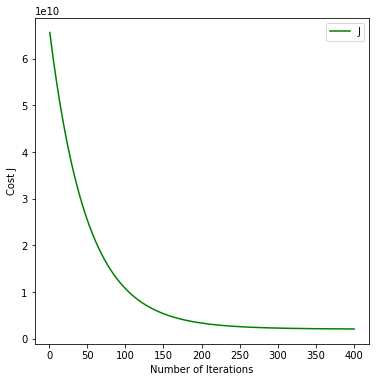

In [145]:
plt.figure(num = 1, figsize = (6, 6))
plt.plot(J_df["Iterations"], J_df["J"], color = "green")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost J")
plt.legend()

Selecting Learning Rates

In this part, we will get to try out different learning rates for the dataset and find a learning rate that converges quickly.

In [158]:
def learningRate(nums_rate, learningRate, delta):
    plt.figure(num = nums_rate, figsize = (6, 6))
    colors = ["green", "brown", "blue", "purple", "red", "black", "yellow"]
    labels = []
    
    for i in range(0, nums_rate, 1):
        J_list = gradientDesc(0, 0, 0, 400, learningRate)[4]
        iterations_list = list(np.arange(1, len(J_list) + 1, 1))
        J_df = pd.DataFrame({"Iterations": iterations_list, "J": J_list})
        
        plt.plot(J_df["Iterations"], J_df["J"], color = colors[i])
        labels.append(learningRate)
        
        learningRate = learningRate * delta
    
    
    plt.xlabel("Number of Iterations")
    plt.ylabel("Cost J")
    plt.legend(labels = labels)

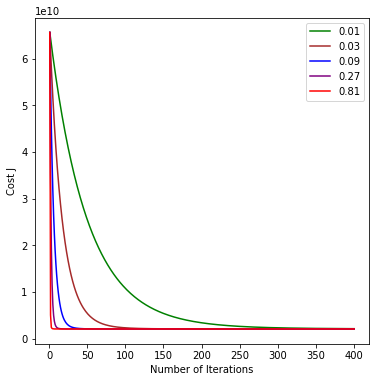

In [160]:
learningRate(5, 0.01, 3)

Normal Equations

Formula: theta = inv((transpose(X) * X)) * transpose(X) * Y

Using this formula does not require any feature scaling.

In [180]:
Y_matrix = np.transpose(np.mat(data1["Y"]))
X_transpose = np.transpose(X_matrix)
theta_matrix = (X_transpose * X_matrix).I * X_transpose * Y_matrix

In [181]:
theta_matrix

matrix([[340412.65957447],
        [109447.79646964],
        [ -6578.35485416]])